<a href="https://colab.research.google.com/github/ashish134/Machine-Learning-Assignments/blob/main/ML_EDA_Assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [4]:

#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
#(Show the shape and column names as well.)
#(Include your Python code and output in the code box below.
from google.colab import files
import pandas as pd

uploaded = files.upload()   # pick your "BIKE DETAILS.csv"
df = pd.read_csv("BIKE DETAILS.csv")
display(df.head(10))
print('Shape of the data frame is', df.shape)
print('Names of columns are:', df.columns.tolist())

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Shape of the data frame is (1061, 7)
Names of columns are: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


In [6]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.
print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Approach to Handle Missing Values

Identify Missing Values

Use checks (isnull(), sum()) to find missing data.

Understand Type of Missingness

MCAR: Random, safe to drop or impute.

MAR: Related to other variables, use informed imputation.

MNAR: Depends on value itself, deeper analysis needed.

Choose Strategy

Numerical: Mean/median, interpolation, or predictive models.

Categorical: Mode or constant placeholder (e.g., “Unknown”).

Drop Data (if necessary)

Drop rows (few missing) or columns (heavily missing).

Verify & Validate

Recheck dataset to confirm missing values are handled.

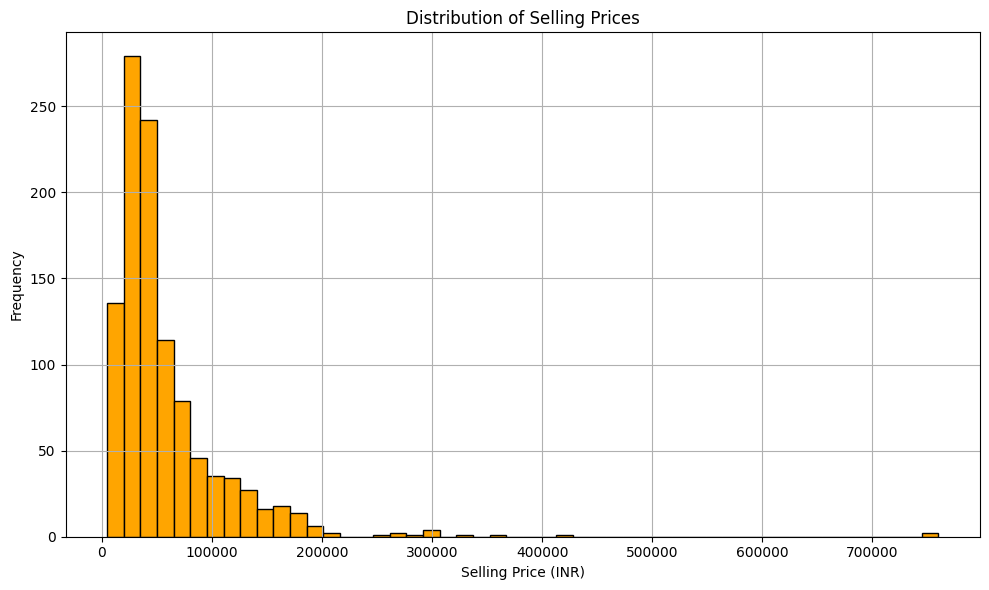

In [7]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Trend Description:-

The distribution is right-skewed, meaning:

Most bikes are sold at lower prices (e.g., INR 20,000 to INR 60,000). Fewer bikes are sold at higher prices (above INR 1,00,000).

There are some outliers or premium bikes priced above INR 2,00,000, which are less frequent.

This trend suggests that the majority of bikes in the dataset are affordable or mid-range, with a smaller segment of high-end or premium models.

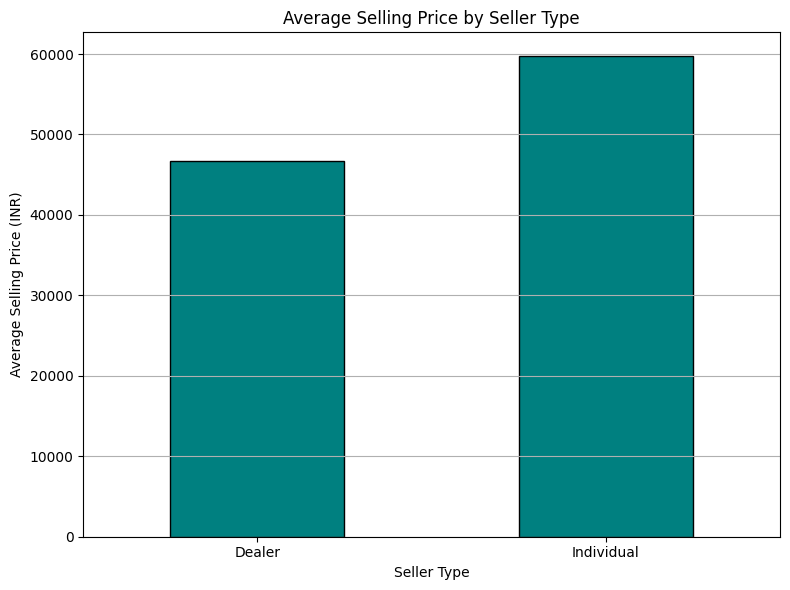

In [8]:
#Q4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

# Group by seller_type and calculate average selling price
avg_price_by_seller = df.groupby("seller_type")["selling_price"].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_price_by_seller.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (INR)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

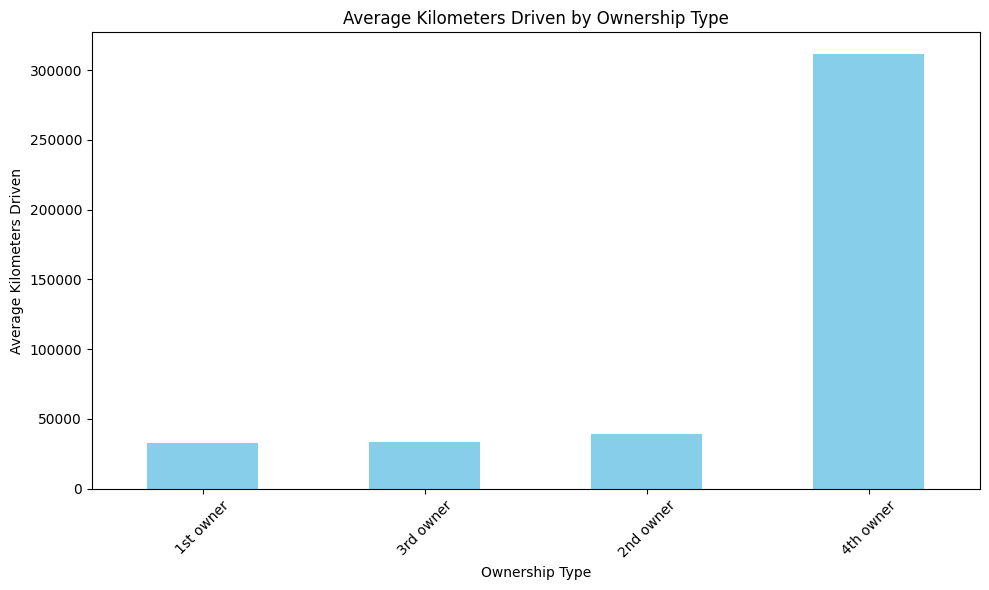

In [9]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

# Group by 'owner' and calculate the average 'km_driven'
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values()

# Plot the results using matplotlib
plt.figure(figsize=(10, 6))
avg_km_by_owner.plot(kind='bar', color='skyblue')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Summary statistics before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())

# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nAfter removing outliers:")
print(df_filtered['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


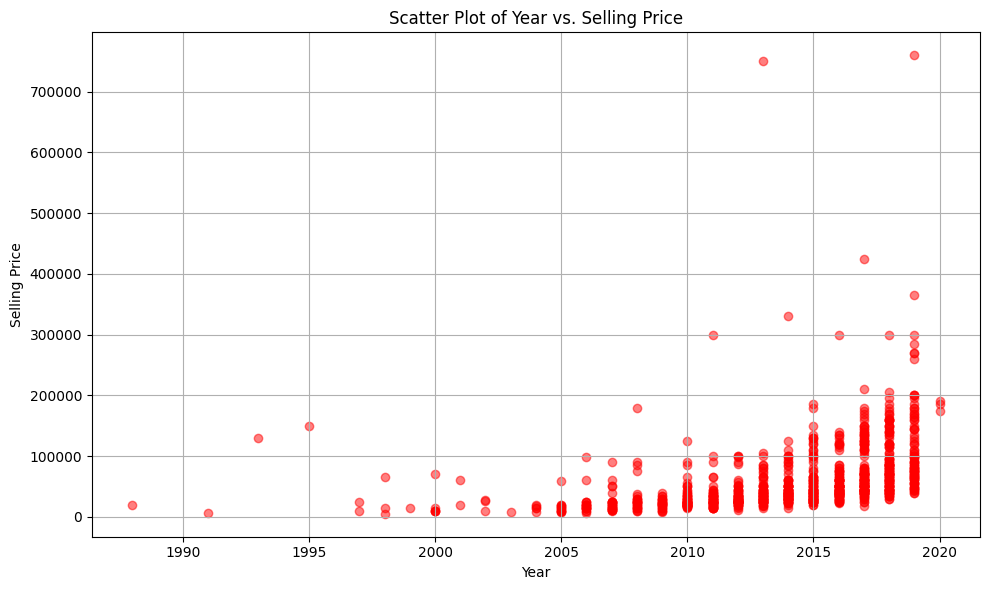

In [11]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, color='red')
plt.title('Scatter Plot of Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

# Apply one-hot encoding to the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'])

# Display the first 5 rows
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


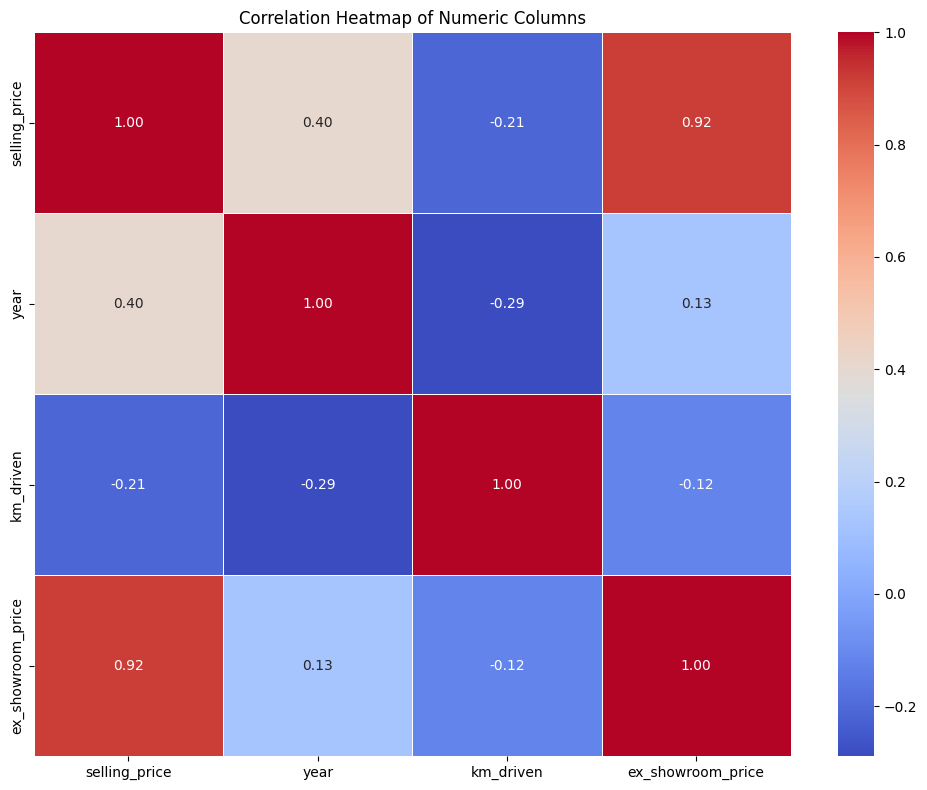

In [13]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()

Question 10: Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.

Here's a brief summary of the findings from the given dataset analysis:

Key Factors Affecting a Bike's Selling Price:- Based on correlation analysis: Ex-showroom Price: Strong positive correlation with selling price — higher original value leads to higher resale value. Year: Moderate positive correlation — newer bikes tend to sell for more. Km Driven: Slight negative correlation — more usage generally lowers the selling price.

Data Cleaning Performed: Outlier Removal: Used the IQR method to detect and remove outliers from the km_driven column, improving the reliability of statistical analysis.

Feature Engineering Applied: One-Hot Encoding: Transformed the seller_type column into numeric format using one-hot encoding to prepare the data for modeling.

Summary Statistics: Before Cleaning (km_driven):- Mean: 34,359 km Std Dev: 51,623 km Max: 880,000 km

After Cleaning:- Mean: 28,203 km Std Dev: 19,552 km Max: 86,000 km